In [1]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [2]:
raw_df = pd.read_csv('zillow_data.csv')

In [3]:
raw_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
raw_df = raw_df.drop(['Metro', 'RegionID'], axis=1)
raw_df

,RegionName,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,1338,Ashfield,MA,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,3293,Woodstock,NH,Grafton,14720,92700.0,92500.0,92400.0,92200.0,92100.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,40404,Berea,KY,Madison,14721,57100.0,57300.0,57500.0,57700.0,58000.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,81225,Mount Crested Butte,CO,Gunnison,14722,191100.0,192400.0,193700.0,195000.0,196300.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [5]:
def melt_data(df):
    melted = pd.melt(raw_df, id_vars=['RegionName', 'City', 'State', 'CountyName', 'SizeRank'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [6]:
df = melt_data(raw_df)
df

,RegionName,City,State,CountyName,SizeRank,date,value
0,60657,Chicago,IL,Cook,1,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,2,1996-04-01,235700.0
2,77494,Katy,TX,Harris,3,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Franklin,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Grafton,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Madison,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,Gunnison,14722,2018-04-01,664400.0


In [7]:
average_prices_df = df.groupby('date').aggregate({'value':'mean'})
average_prices_df 

,value
date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [8]:
df.set_index(df['date'], inplace = True)
df.drop('date',axis=1, inplace=True)
df

,RegionName,City,State,CountyName,SizeRank,value
date,,,,,,
1996-04-01,60657,Chicago,IL,Cook,1,334200.0
1996-04-01,75070,McKinney,TX,Collin,2,235700.0
1996-04-01,77494,Katy,TX,Harris,3,210400.0
1996-04-01,60614,Chicago,IL,Cook,4,498100.0
1996-04-01,79936,El Paso,TX,El Paso,5,77300.0
...,...,...,...,...,...,...
2018-04-01,1338,Ashfield,MA,Franklin,14719,209300.0
2018-04-01,3293,Woodstock,NH,Grafton,14720,225800.0
2018-04-01,40404,Berea,KY,Madison,14721,133400.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744704 entries, 1996-04-01 to 2018-04-01
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionName  int64  
 1   City        object 
 2   State       object 
 3   CountyName  object 
 4   SizeRank    int64  
 5   value       float64
dtypes: float64(1), int64(2), object(3)
memory usage: 200.0+ MB


In [10]:
df.isna().sum()

RegionName    0
City          0
State         0
CountyName    0
SizeRank      0
value         0
dtype: int64

In [11]:
df_log = np.log(df['value'])

<AxesSubplot:xlabel='date'>

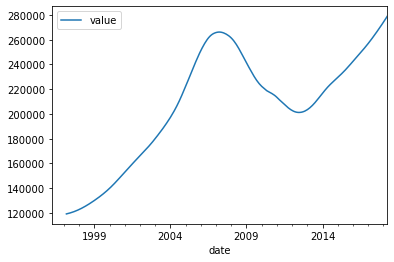

In [12]:
df_rolling = pd.DataFrame(average_prices_df['value'].rolling(12).mean())
df_rolling.plot()

<AxesSubplot:xlabel='date'>

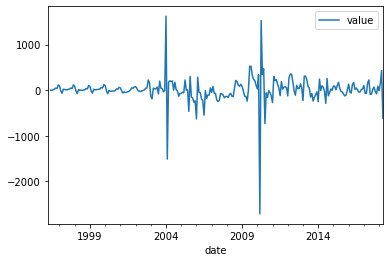

In [13]:
df_diff = pd.DataFrame(average_prices_df['value'].diff().diff())
df_diff.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(df):
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    df_test = adfuller(df)
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    roll_mean.plot()
    roll_std.plot()
    return df_test

In [21]:
melted = pd.DataFrame(df['value'])
melted

,value
date,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


In [ ]:
stationarity_check(melted)

<AxesSubplot:xlabel='date'>

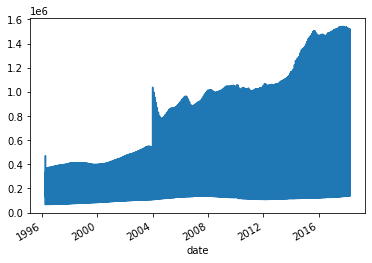

In [16]:
df['value'].ewm(halflife=12).mean().plot()

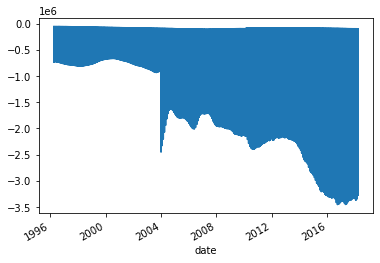

In [17]:
df_wrm = df.ewm(halflife=4).mean()
df_minus_wrm = df_log - df_wrm['value']
df_minus_wrm.plot();

In [18]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!


NameError: name 'matplotlib' is not defined